In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install matplotlib

In [41]:
# import numpy as np
# import pandas as pd 
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import random
# import os
# # print(os.listdir("../input"))


In [45]:
# import keras,os
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
# import numpy as np
# from keras.applications import VGG19,VGG16
# from keras.models import Model
# from keras import optimizers , layers, applications



import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers, layers, applications

from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import VGG19,VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [46]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

In [47]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in ("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)))
        
        
test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in ("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)):
        test_non_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)))
    else:
        test_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)))

In [48]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

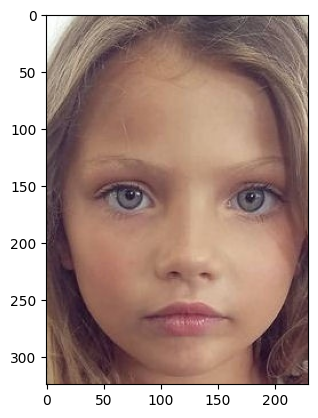

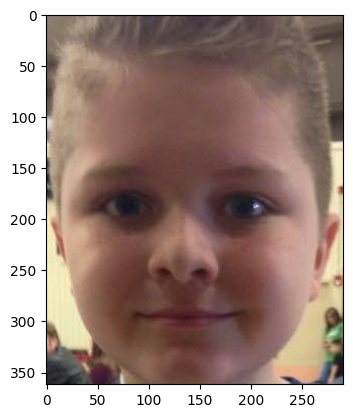

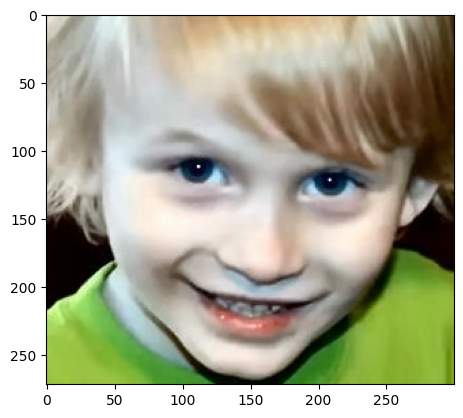

In [49]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [50]:
# filenames = os.listdir(train_data)
# categories = []
# for filename in filenames:
#     category = filename.split('.')[0]
#     if category == 'Autistic':
#         categories.append(str(1))
#     else:
#         categories.append(str(0))

# train_df = pd.DataFrame({
#     'filename': filenames,
#     'category': categories
# })

In [51]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)

In [52]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [53]:
X_val, y_val = read_and_process_image(val_imgs)

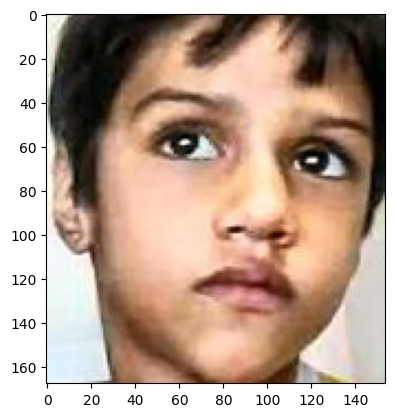

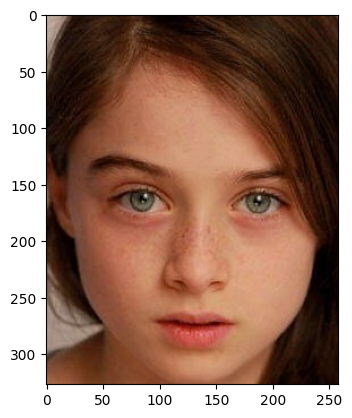

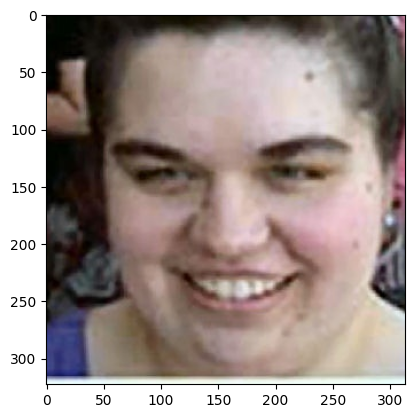

In [54]:
import matplotlib.image as mpimg
for ima in val_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [55]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [56]:
print("Shape of Train images:", X_train.shape)
print("Shape of Train labels:", y_train.shape)
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of Train images: (2540, 224, 224, 3)
Shape of Train labels: (2540,)
Shape of validation images: (100, 224, 224, 3)
Shape of validation labels: (100,)


In [57]:
# train_df['category'].value_counts().plot.bar()

In [30]:
# test_filenames = os.listdir(test_data)
# categories = []
# for filename in filenames:
#     category = filename.split('.')[0]
#     if category == 'Autistic':
#         categories.append(str(1))
#     else:
#         categories.append(str(0))

# test_df = pd.DataFrame({
#     'filename': filenames,
#     'category': categories
# })

In [58]:
test_df.head()



,filename,category
0,Autistic.0.jpg,1
1,Autistic.1.jpg,1
2,Autistic.10.jpg,1
3,Autistic.100.jpg,1
4,Autistic.1000.jpg,1


In [59]:
# sample = random.choice(filenames)
# image = load_img("C:/Users/Admin/Downloads/Thesis Code/AutismDataset/"+sample)
# plt.imshow(image)


In [61]:
image_size = 224
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 10
batch_size = 64

pre_trained_model = VGG19(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [62]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]


In [64]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_data, 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2286 validated image filenames belonging to 2 classes.


In [65]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    test_data, 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 28 validated image filenames belonging to 2 classes.


C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 226 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [66]:
#Fit Model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9620\3478809399.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
35/35 [==============================] - 2174s 62s/step - loss: 0.7788 - accuracy: 0.5441 - val_loss: 0.6466 - val_accuracy: 0.6429
Epoch 2/10
35/35 [==============================] - 2074s 59s/step - loss: 0.6258 - accuracy: 0.6530
Epoch 3/10
35/35 [==============================] - 2114s 60s/step - loss: 0.6013 - accuracy: 0.6818
Epoch 4/10
35/35 [==============================] - 2062s 59s/step - loss: 0.5309 - accuracy: 0.7417
Epoch 5/10
35/35 [==============================] - 2075s 59s/step - loss: 0.4917 - accuracy: 0.7592
Epoch 6/10
35/35 [==============================] - 2095s 60s/step - loss: 0.4781 - accuracy: 0.7799
Epoch 7/10
35/35 [==============================] - 2059s 59s/step - loss: 0.4483 - accuracy: 0.7979
Epoch 8/10
35/35 [==============================] - 2058s 59s/step - loss: 0.4354 - accuracy: 0.7894
Epoch 9/10
35/35 [==============================] - 2074s 59s/step - loss: 0.4286 - accuracy: 0.8024
Epoch 10/10
35/35 [==============================

In [67]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

C:\Users\Admin\AppData\Local\Temp\ipykernel_9620\2489114373.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)


Test: accuracy = 0.857143  ;  loss = 0.374381 


In [68]:
model.save('vgg19.h5')